In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Supervised Learning: Classification

## Reading and investigating the data

In [2]:
data = pd.read_csv('bankdata.csv')

In [3]:
data.shape

(74364, 9)

In [4]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [5]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [6]:
data['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

### Investigating the numerical variables

In [7]:
data.describe()

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [8]:
data['duration'].value_counts()

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [9]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

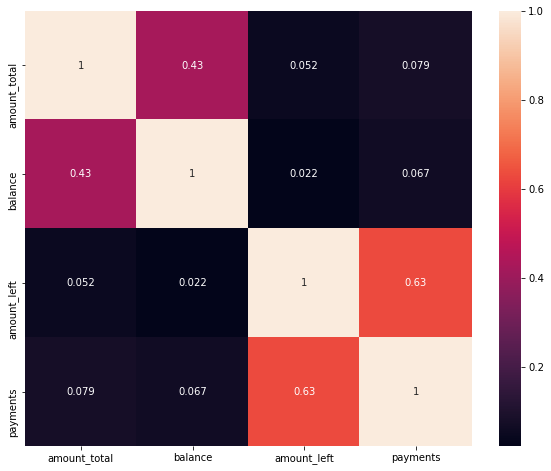

In [10]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

payments and amount_left have a rather high correlation, so we will include only one of them in the model

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


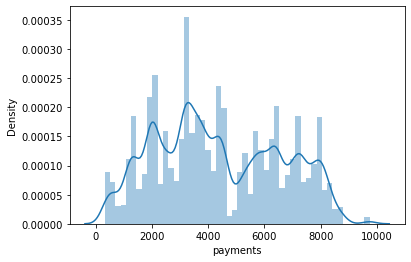

In [11]:
#sns.distplot(data['amount_total'])
#plt.show()

#sns.distplot(data['balance'])
#plt.show()

sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [12]:
# We have to standard the data because they are too large

from sklearn.preprocessing import StandardScaler
data_num = data.select_dtypes(include = np.number).drop(columns = 'amount_left')
print(data_num.head())


# Standardizing data

transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)

print(x.head())

   amount_total  balance  payments
0       44749.0  45549.0    3317.0
1        1000.0   1000.0    4399.0
2        1100.0   1100.0     609.0
3         700.0    700.0    1921.0
4         900.0    900.0    3492.0
   amount_total   balance  payments
0      3.147453 -0.018599 -0.471289
1     -0.582545 -1.769754  0.019231
2     -0.574019 -1.765823 -1.698947
3     -0.608123 -1.781547 -1.104158
4     -0.591071 -1.773685 -0.391953


C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


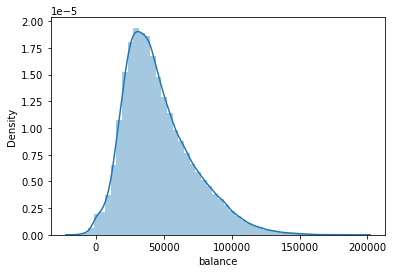

In [13]:
sns.distplot(data['balance'])
plt.show()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


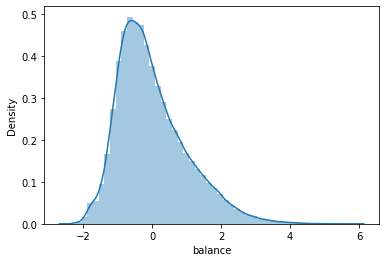

In [14]:
sns.distplot(x['balance'])
plt.show()

### Getting dummies for the categorical variables

In [15]:
# Converting categorical variables to numerical using one hot encoder. It also transforms the data
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
enc = OneHotEncoder()
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,x2_pojistne,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
categorical.sum(axis = 1)

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
74359    4.0
74360    4.0
74361    4.0
74362    4.0
74363    4.0
Length: 74364, dtype: float64

In [17]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,...,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Splitting into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [20]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806226047199623

In [21]:
y_test.value_counts()

A    25839
B     3907
Name: status, dtype: int64

In [22]:
pd.Series(predictions).value_counts()

A    29118
B      628
dtype: int64

What happened in terms of the classes?

### Decision Tree

In [23]:
# We have to use Decision Tree to verify the best predicted model, because it gave us the best % when we compared with others.
# We have to repeat all the processes for decion tree

from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9947892153566866

In [25]:
pd.Series(predictions).value_counts()

A    25812
B     3934
dtype: int64

In [26]:
decisiontree.feature_importances_

array([1.43700572e-02, 1.24318571e-01, 6.59697023e-01, 1.19579297e-03,
       5.94555031e-04, 3.96652049e-04, 2.42182799e-03, 6.03658608e-04,
       2.44394817e-03, 1.23495802e-04, 4.30298091e-04, 0.00000000e+00,
       6.17843748e-04, 0.00000000e+00, 2.35807823e-04, 8.75971511e-05,
       0.00000000e+00, 7.88930032e-02, 6.52563194e-02, 2.06008732e-02,
       9.69774718e-03, 1.80149280e-02])

In [27]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'amount_total': 0.014370057224432999, 'balance': 0.12431857126518245, 'payments': 0.6596970230895963, 'x0_PRIJEM': 0.0011957929728950885, 'x0_VYBER': 0.0005945550310770408, 'x0_VYDAJ': 0.00039665204851268134, 'x1_prevod': 0.0024218279898311577, 'x1_unknown': 0.0006036586083928173, 'x1_vklad': 0.0024439481734582144, 'x1_vyber': 0.00012349580156275117, 'x2_pojistne': 0.000430298090777566, 'x2_sankc. urok': 0.0, 'x2_sipo': 0.0006178437478618077, 'x2_sluzby': 0.0, 'x2_unknown': 0.00023580782333597949, 'x2_urok': 8.759715105636186e-05, 'x2_uver': 0.0, 'x3_12': 0.07889300321728307, 'x3_24': 0.06525631939623916, 'x3_36': 0.020600873216308147, 'x3_48': 0.00969774717756646, 'x3_60': 0.018014927974630026}


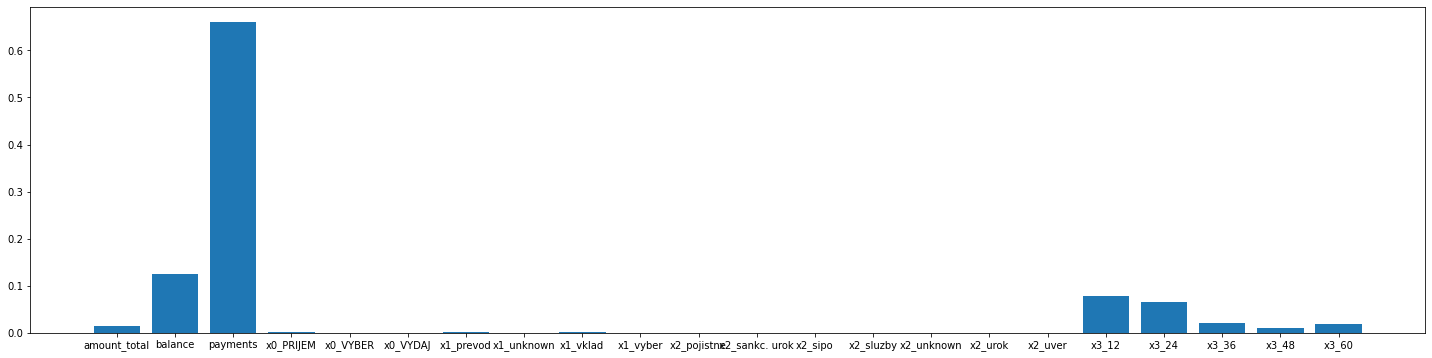

In [28]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [29]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predictions = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.8984737443689907
A    28611
B     1135
dtype: int64


### K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.9279567000605123
A    26390
B     3356
dtype: int64


In [64]:
#help(KNeighborsClassifier)

## Supervised Learning: Regression

In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

## Model Evaluation

### Creating the Confusion Matrix

In [33]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [34]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806226047199623

In [35]:
# we will import the confusion matrix

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

# From Cat 1, 136 were fine, but we predicted wrongly and the cat B, 492 were predicted wrongly

[[25703   136]
 [ 3415   492]]


<AxesSubplot:>

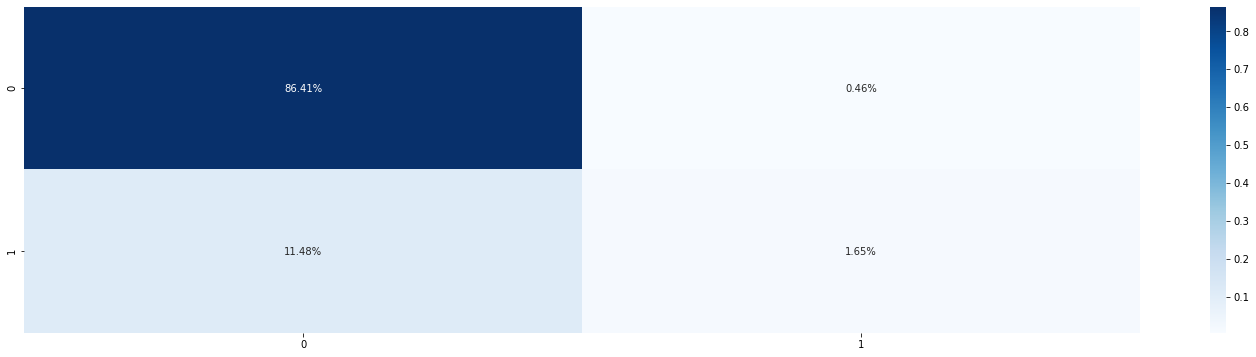

In [36]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# True positive These are the people that has credit problems that were correctly identified by the algorithm
# True Negative  These are the people that did not have credit problems that were correctly identified by the algorithm
# False Negative - False negatives are when a worker has credit problems, but the algorithm said they did not have
# False Positive - They are the workers that do not have credit problems, but the algorithm says they do 

# The numbers along the diagonal(either green or blue or any other colour according to the dataset) tell us how many times the samples were correctly classified
# The numbers not on the diagonal (red or any other color) are samples the algorithm messed up

# In conlusion, a confusion matrix tells you what your machine learning algorithm did right and what it did wrong.

# Once we've filled out the confusion matrics, we can calculate two useful metrics: Sensitivity and Specificity

# Senstivity or recall or True Positive Rate tells us what % of patients with heart diseases were correctly identified
# Sensitivity = True Positives/True Positives + False Negatives

# Specificity or Precision or Positive Predictive Value; tells us what % of patients without heart disease were correctly identified.
# Specificity = True Negatives/True Negatives + False Positives

# 


In [ ]:
# The true positive is 1 and the true negative is zero,that is the heatmap above, the 86.41% are the true negative, the 11.48% are what we predictedly, that is the false negative, the are fine, but er predicted them in a bad way
# The True positve are 165% and the 0.46% are the false positive, what we predicted wrongly. 

#### Precision, Recall and the F1 Score

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
# The F-1 Score is the harmonic mean of Precision and Recall, its the average of recall and precision, the avereage is 21%
# precision - True positive,  # out of those we predicted have credit problems, 78% trully has credit problem
# recall - out of all the people that has credit problem, how many we have identified, we predicted 12% of them correctly, which is really bad


print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B')) # 
print(f1_score(y_test, predictions, pos_label='B'))

0.7834394904458599
0.12592782185820323
0.21697905181918414


In [38]:
# Its the average of recall, that is the average of the sick and healthy people we have correctly idientified. That is,  56%
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.5603322301365012

#### ROC and AUC analysis

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

In [79]:
# we need to calculate class probabilities for category B only!
y_pred_proba = logisticr.predict_proba(X_test)[:,1]
y_pred_proba


array([0.01231331, 0.14226319, 0.24060841, ..., 0.06809958, 0.16847148,
       0.20231877])

In [75]:
# calculating false positve rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
fpr, tpr,


(array([0.       , 0.       , 0.       , ..., 0.9967104, 0.9967104,
        1.       ]),
 array([0.00000000e+00, 2.55950857e-04, 9.47018173e-03, ...,
        9.99744049e-01, 1.00000000e+00, 1.00000000e+00]))

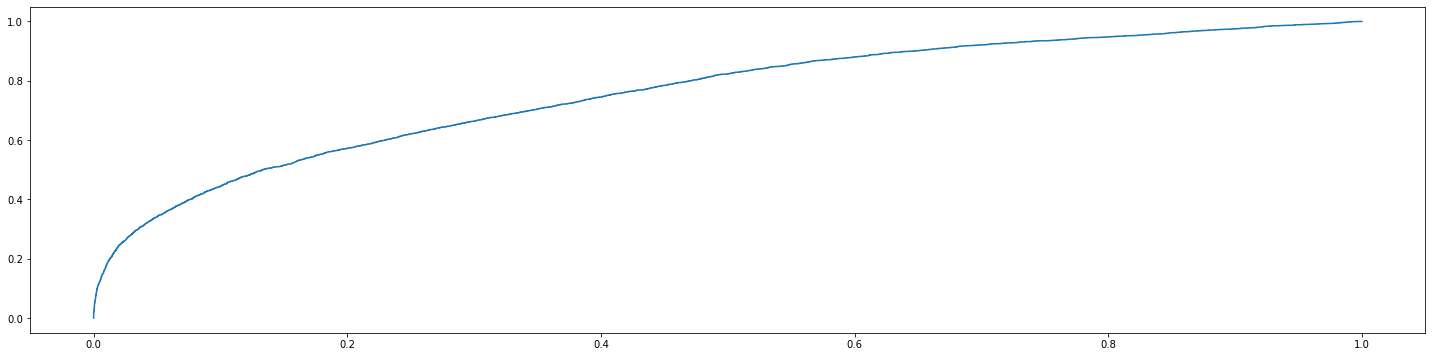

In [76]:
plt.plot(fpr,tpr)

In [68]:
#help(roc_auc_score)

In [42]:
# 0.5 is crap, o.8 is okay and 1.0 is perfect
# 75 of the class B lies under ROC_auc score
# It's another way of measuring how good our model is
roc_auc_score(y_test, y_pred_proba)

0.7585021096902218

### Repeating all the steps for a Decision Tree for comparison:

In [43]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [44]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9946547434949237

In [45]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25747    92]
 [   67  3840]]


<AxesSubplot:>

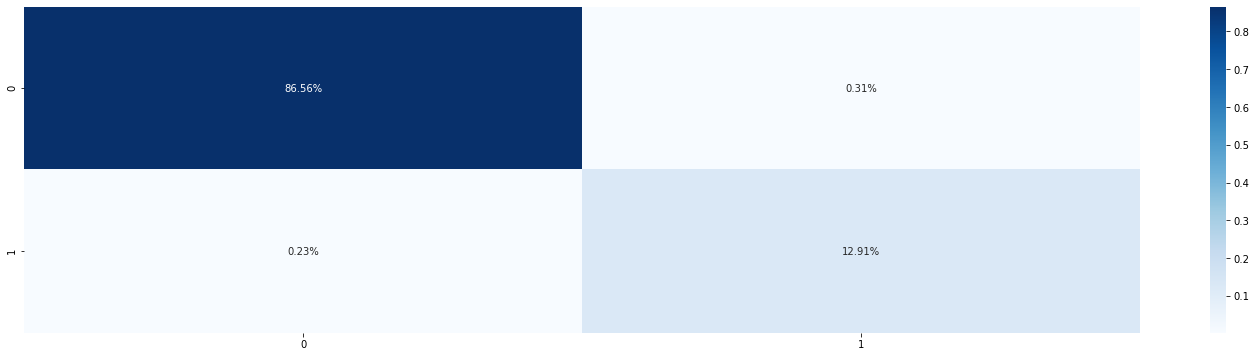

In [46]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [47]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9766022380467956
0.98285129255183
0.979716800612323


In [48]:
balanced_accuracy_score(y_test, predictions)

0.9896453916220971

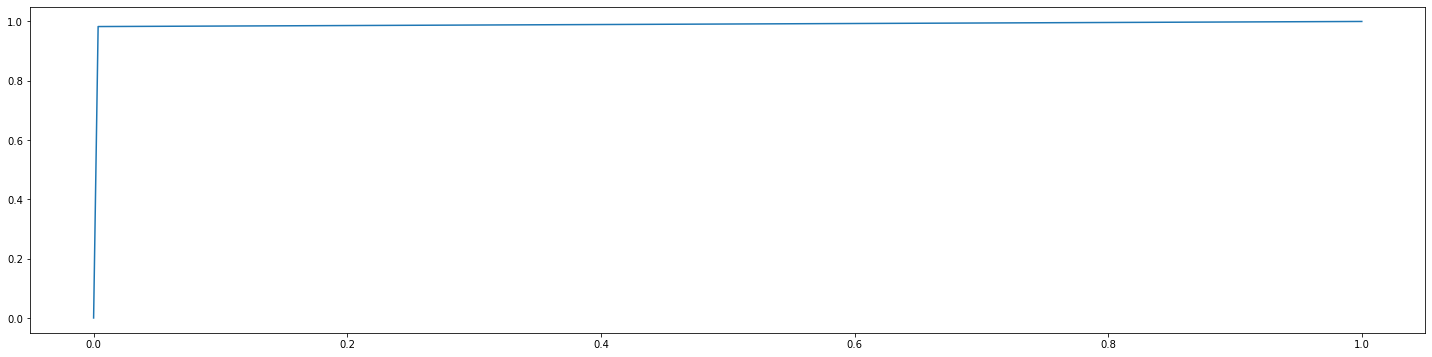

In [49]:
y_pred_proba = decisiontree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [50]:
roc_auc_score(y_test, y_pred_proba)

# the graph above is almost perfect at 99%

0.9896453916220972

### Hyperparameter Tuning

Can we do even better?

In [67]:
from sklearn.model_selection import GridSearchCV
#help(GridSearchCV)

In [66]:
#help(DecisionTreeClassifier)

In [53]:
param_grid_rf = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune_rf = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid_rf,
                       cv=3)

tune_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'splitter': ['best', 'random']})

In [54]:
tune_rf.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}

In [55]:
decisiontree_opt = DecisionTreeClassifier(**tune_rf.best_params_).fit(X_train, y_train)

In [56]:
predictions = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

0.9960330800779936

In [57]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25775    64]
 [   54  3853]]


<AxesSubplot:>

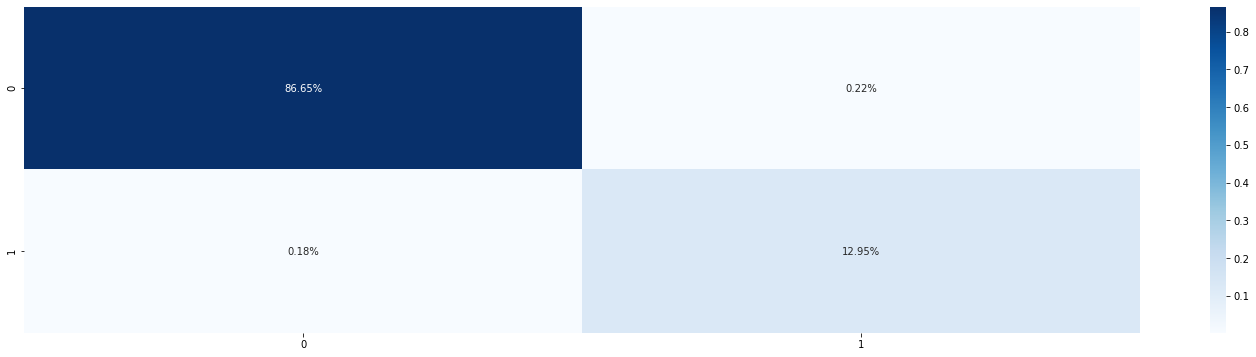

In [58]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [59]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9836609650242533
0.9861786536984899
0.9849182004089979


In [60]:
balanced_accuracy_score(y_test, predictions)

0.9918508888291977

### Cross Validation

Is our split into training and test set biased?

In [65]:
from sklearn.model_selection import cross_validate
#help(cross_validate)

In [62]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")

{'fit_time': array([0.11353517, 0.12496853, 0.10932469, 0.11964631, 0.1226728 ]),
 'score_time': array([0.01562476, 0.01562643, 0.03124452, 0.02488232, 0.02178741]),
 'test_score': array([0.98558888, 0.98808411, 0.98942847, 0.98780189, 0.98892933])}

In [63]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")["test_score"].mean()

0.9877362156111422